In [1]:
import numpy as np
import pandas as pd

In [2]:
dates = pd.date_range("20200101", periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2020-01-01,-1.118376,-0.900955,-1.087841,1.707293
2020-01-02,1.850584,0.806162,0.084893,-1.103871
2020-01-03,0.384158,-0.152824,0.423815,0.821370
2020-01-04,0.643362,-1.379489,0.093474,-0.169629
2020-01-05,-0.917510,2.070463,0.408614,-1.632298
2020-01-06,-1.671943,0.754627,0.545260,-1.287060


Transposing your data:

In [4]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,1.366447,-1.457752,0.113429,0.411142,0.656853,-1.100813
B,0.910697,-1.570098,-1.500051,-0.119177,0.868072,0.443117
C,2.362575,0.802584,-0.389919,-0.248844,-0.362440,0.174457
D,-0.298023,0.417324,-2.332029,-0.100385,0.192098,-0.646547


sort by an axias

In [5]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,-0.298023,2.362575,0.910697,1.366447
2020-01-02,0.417324,0.802584,-1.570098,-1.457752
2020-01-03,-2.332029,-0.389919,-1.500051,0.113429
2020-01-04,-0.100385,-0.248844,-0.119177,0.411142
2020-01-05,0.192098,-0.362440,0.868072,0.656853
2020-01-06,-0.646547,0.174457,0.443117,-1.100813


***Getting***

Selecting a single column, which yields a Series, equivalent to df.A:

In [4]:
df["A"]

2020-01-01   -1.118376
2020-01-02    1.850584
2020-01-03    0.384158
2020-01-04    0.643362
2020-01-05   -0.917510
2020-01-06   -1.671943
Freq: D, Name: A, dtype: float64

Selection by label

In [5]:
df

,A,B,C,D
2020-01-01,-1.118376,-0.900955,-1.087841,1.707293
2020-01-02,1.850584,0.806162,0.084893,-1.103871
2020-01-03,0.384158,-0.152824,0.423815,0.821370
2020-01-04,0.643362,-1.379489,0.093474,-0.169629
2020-01-05,-0.917510,2.070463,0.408614,-1.632298
2020-01-06,-1.671943,0.754627,0.545260,-1.287060


In [6]:
df.loc[dates[0]]

A   -1.118376
B   -0.900955
C   -1.087841
D    1.707293
Name: 2020-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [7]:
df.loc[:, ["A", "B"]]

,A,B
2020-01-01,-1.118376,-0.900955
2020-01-02,1.850584,0.806162
2020-01-03,0.384158,-0.152824
2020-01-04,0.643362,-1.379489
2020-01-05,-0.917510,2.070463
2020-01-06,-1.671943,0.754627


Showing label slicing, both endpoints are included:

In [8]:
df.loc["20200102":"20200104", ["A", "B"]]

,A,B
2020-01-02,1.850584,0.806162
2020-01-03,0.384158,-0.152824
2020-01-04,0.643362,-1.379489


In [10]:
df.loc[[dates[0], dates[2]], ["A", "B"]]

,A,B
2020-01-01,-1.118376,-0.900955
2020-01-03,0.384158,-0.152824


Reduction in the dimensions of the returned object:

In [11]:
df.loc["20200102", ["A", "B"]]

A    1.850584
B    0.806162
Name: 2020-01-02 00:00:00, dtype: float64

In [14]:
df.loc[ :, ["A", "B"]]

,A,B
2020-01-01,-1.118376,-0.900955
2020-01-02,1.850584,0.806162
2020-01-03,0.384158,-0.152824
2020-01-04,0.643362,-1.379489
2020-01-05,-0.917510,2.070463
2020-01-06,-1.671943,0.754627


For getting a scalar value:

In [15]:
df.loc[dates[0], "A"]

-1.118375737355203

***Missing data***

In [17]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2020-01-01,-1.118376,-0.900955,-1.087841,1.707293,1.0
2020-01-02,1.850584,0.806162,0.084893,-1.103871,1.0
2020-01-03,0.384158,-0.152824,0.423815,0.821370,NaN
2020-01-04,0.643362,-1.379489,0.093474,-0.169629,NaN


To drop any rows that have missing data.

In [18]:
df1.dropna(how="any")

,A,B,C,D,E
2020-01-01,-1.118376,-0.900955,-1.087841,1.707293,1.0
2020-01-02,1.850584,0.806162,0.084893,-1.103871,1.0


Filling missing data.

In [19]:
df1.fillna(value=0)

,A,B,C,D,E
2020-01-01,-1.118376,-0.900955,-1.087841,1.707293,1.0
2020-01-02,1.850584,0.806162,0.084893,-1.103871,1.0
2020-01-03,0.384158,-0.152824,0.423815,0.821370,0.0
2020-01-04,0.643362,-1.379489,0.093474,-0.169629,0.0


***Grouping***

By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [20]:
df = pd.DataFrame(
      {
           "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
           "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
           "C": np.random.randn(8),
           "D": np.random.randn(8),
       }
    )
df

,A,B,C,D
0,foo,one,-0.225598,-0.382147
1,bar,one,0.942783,-1.563772
2,foo,two,1.871132,-0.923249
3,bar,three,1.191633,0.126086
4,foo,two,-0.639894,-0.893588
5,bar,two,-0.301793,-0.530269
6,foo,one,-1.173348,-1.043108
7,foo,three,1.129599,-0.019893


Grouping and then applying the sum() function to the resulting groups.

In [21]:
df.groupby("A").sum()

,C,D
A,,
bar,1.832622,-1.967954
foo,0.961891,-3.261986


More groupby 
https://pandas.pydata.org/docs/reference/groupby.html

In [23]:
df.groupby("A").mean()

,C,D
A,,
bar,0.610874,-0.655985
foo,0.192378,-0.652397


Plotting


We use the standard convention for referencing the matplotlib API:

In [26]:
import matplotlib.pyplot as plt
plt.close("all")

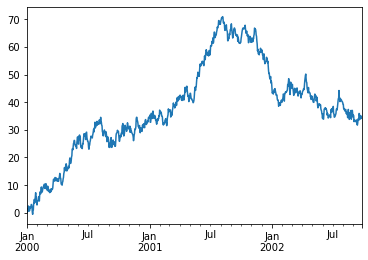

In [27]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [28]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"] )
df

,A,B,C,D
2000-01-01,-0.123942,0.954985,-0.897061,-1.647383
2000-01-02,1.506466,-0.676435,-0.714815,-0.602962
2000-01-03,-0.458949,-0.969549,1.230052,-0.412940
2000-01-04,-0.780604,0.646153,-1.441626,1.063543
2000-01-05,-1.669604,-0.976281,-1.174727,-0.660052
...,...,...,...,...
2002-09-22,0.140725,-1.229400,0.861763,-0.910078
2002-09-23,1.417514,-0.328484,-0.244329,-0.162982
2002-09-24,1.135977,-0.423734,2.046748,-0.019781
2002-09-25,-0.170927,0.168253,0.472153,1.444282


<Figure size 432x288 with 0 Axes>

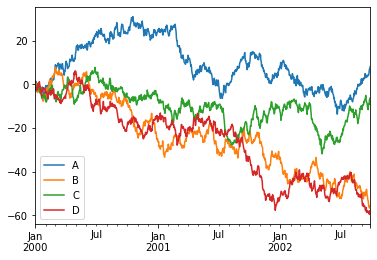

In [29]:
df = df.cumsum()
plt.figure()
df.plot()
plt.legend()
#plt.legend(loc='best')

Getting data in/out

CSV

In [31]:
df3 = pd.read_csv('Iris.csv')

print(df3.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


<Figure size 432x288 with 0 Axes>

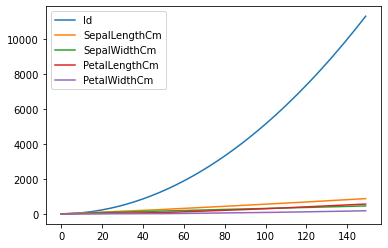

In [32]:
df3 = df3.cumsum()
plt.figure()
df3.plot()
plt.legend()